<a href="https://colab.research.google.com/github/mmmhdp/dlc/blob/main/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
from google.colab import drive
all_df = pd.read_csv("forest_dataset.csv", header=None)

all_df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
1,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
2,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
3,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
4,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1


In [7]:
# all_df.info()
# all_df.isna().mean()
# all_df.shap
# all_df.sort_values(by=all_df.columns[0])
# all_df.corr().style.background_gradient(cmap="coolwarm").set_precision(2)

In [8]:
labels = all_df[all_df.columns[54]]
features = all_df[all_df.columns[:54]]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
tr_l, te_l, tr_f, te_f = train_test_split(
    labels, features,
    test_size=0.3,
    random_state=0
)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [12]:
clf = KNeighborsClassifier()

In [19]:
metric = np.array(["minkowski","manhattan", "euclidean"])
weights = np.array(["uniform", "distance"])
n_neighbors = np.arange(1,10)

par_grid = {
    "n_neighbors": n_neighbors,
    "metric": metric,
    "weights": weights
}

s = GridSearchCV(
    estimator=clf,
    param_grid=par_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
    )

s.fit(
    X=tr_f,
    y=tr_l
    )

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [31]:
pred_l = s.best_estimator_.predict(te_f)
pred_l

array([1, 1, 6, ..., 2, 6, 1])

In [27]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy = accuracy_score(
    y_pred=pred_l,
    y_true=te_l
)
accuracy

0.7660779740086637

In [69]:
pred_prob = s.best_estimator_.predict_proba(
    X=te_f
    )
pred_prob

array([1., 0., 0., 0., 0., 0., 0., 0.])

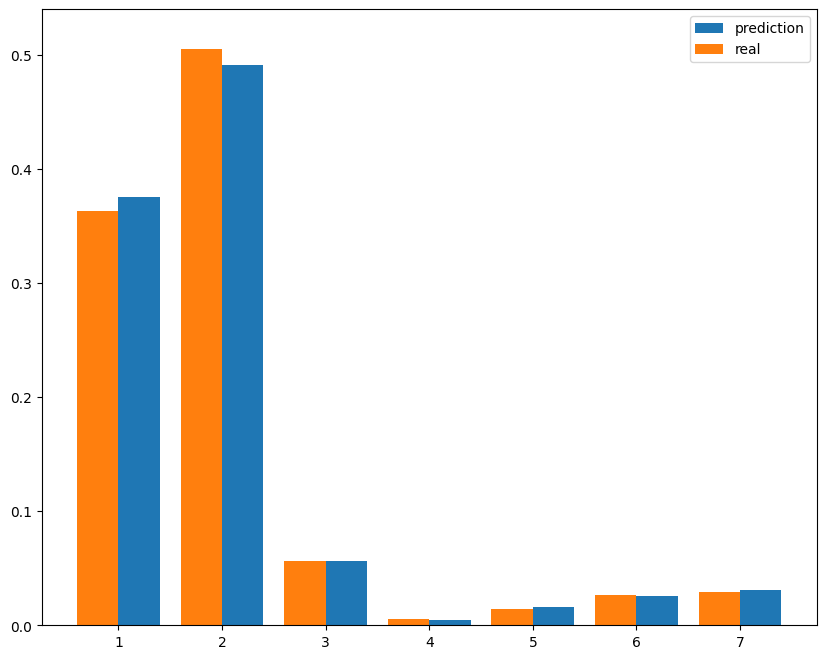

In [62]:
%matplotlib inline

unique, freq = np.unique(te_l, return_counts=True)
freq = list(map(lambda x: x / len(te_l), freq))

pred_freq = pred_prob.mean(axis=0)
pred_freq= pred_freq[:7]

plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

In [71]:
pred_freq[2]

0.05639968756641939